# Grain Sampling

--Yongtao Liu

# Download Data

In [1]:
!pip install igor2

In [2]:
!pip install SciFiReaders

# Import .ibw

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import SciFiReaders
import glob
from scipy.optimize import curve_fit

You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.


In [4]:
!gdown https://drive.google.com/uc?id=1TdVCUQUe6_D_cjD-SeVUiFLpsc-_Wx10

Downloading...
From (original): https://drive.google.com/uc?id=1TdVCUQUe6_D_cjD-SeVUiFLpsc-_Wx10
From (redirected): https://drive.google.com/uc?id=1TdVCUQUe6_D_cjD-SeVUiFLpsc-_Wx10&confirm=t&uuid=d0769e5a-81a8-4530-8b01-cbb5f80dc476
To: /content/samples_compiled.zip
100% 111M/111M [00:02<00:00, 44.7MB/s]


In [5]:
!unzip /content/samples_compiled.zip

Archive:  /content/samples_compiled.zip
   creating: samples_compiled/C3_new_GB_PEDOT_CB/
   creating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/
   creating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/dark/
  inflating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/dark/five_micron0000.ibw  
  inflating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/dark/ten_micron0001.ibw  
  inflating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/dark/two_micron0000.ibw  
   creating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/illuminated/
  inflating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/illuminated/five_micron.ibw  
  inflating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/illuminated/ten_micron.ibw  
  inflating: samples_compiled/C3_new_GB_PEDOT_CB/kpfm/illuminated/two_micron.ibw  
   creating: samples_compiled/C3_new_GB_PEDOT_DCB/
   creating: samples_compiled/C3_new_GB_PEDOT_DCB/conductive/
   creating: samples_compiled/C3_new_GB_PEDOT_DCB/conductive/dark/
  inflating: samples_compiled/C3_new_GB_PEDOT_DCB/conduct

In [87]:
path = "/content/samples_compiled/C3_new_GB_SnO2_CB/06132024/topography"
os.chdir(path)

In [130]:
rawdata = "5micron.ibw"

In [131]:
reader = SciFiReaders.IgorIBWReader(rawdata)
data = reader.read()

In [132]:
data

[sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: HeightRetrace (m)
  and Dimensions: 
 x:  x (m) of size (256,)
 y:  y (m) of size (256,),
 sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: DeflectionRetrace (m)
  and Dimensions: 
 x:  x (m) of size (256,)
 y:  y (m) of size (256,),
 sidpy.Dataset of type IMAGE with:
  dask.array<array, shape=(256, 256), dtype=float32, chunksize=(256, 256), chunktype=numpy.ndarray>
  data contains: ZSensorRetrace (m)
  and Dimensions: 
 x:  x (m) of size (256,)
 y:  y (m) of size (256,)]

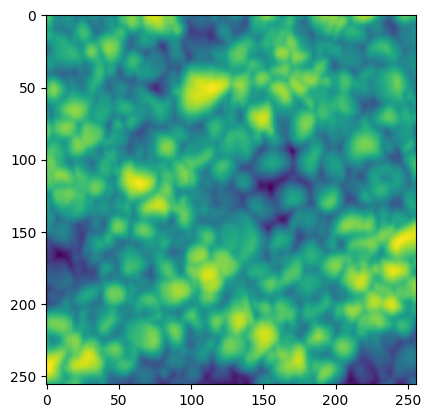

In [133]:
height = data[0]

plt.imshow(height)

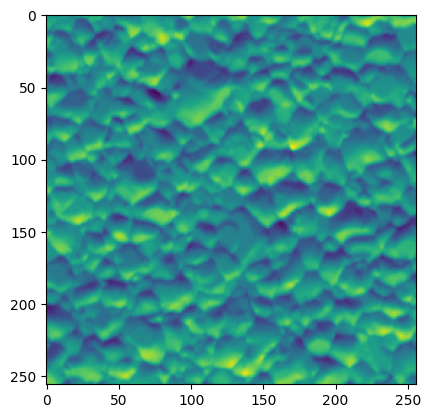

In [134]:
deflection = data[1]

plt.imshow(deflection)

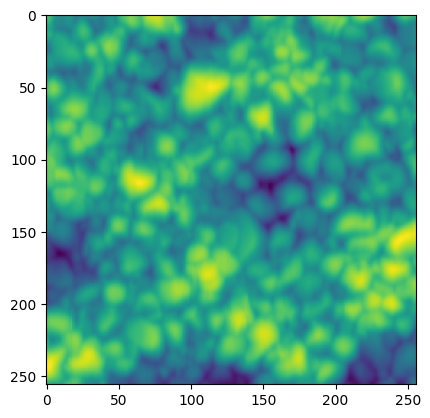

In [135]:
zsensor = data[2]
plt.imshow(zsensor)

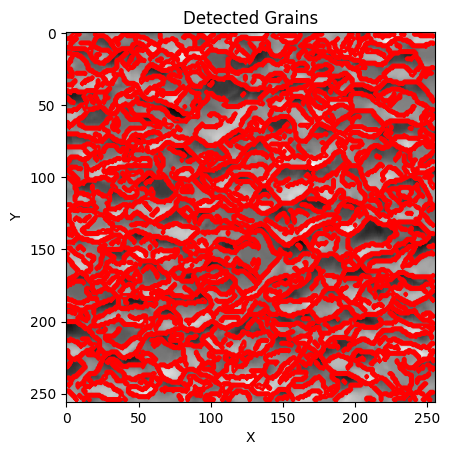

In [139]:
# prompt: write code to detect grains from the height data

import skimage.feature

img = np.array(height)
img = (img - img.min())/img.max()
# Detect grains using the Canny edge detector
edges = skimage.feature.canny(deflection, sigma=1)

# Find the contours of the grains
contours = skimage.measure.find_contours(edges, 0.2)

# Plot the contours
fig, ax = plt.subplots()
ax.imshow(deflection, cmap="gray")
for contour in contours:
  ax.plot(contour[:, 1], contour[:, 0], linewidth=2, c = 'r')
ax.set_title("Detected Grains")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html

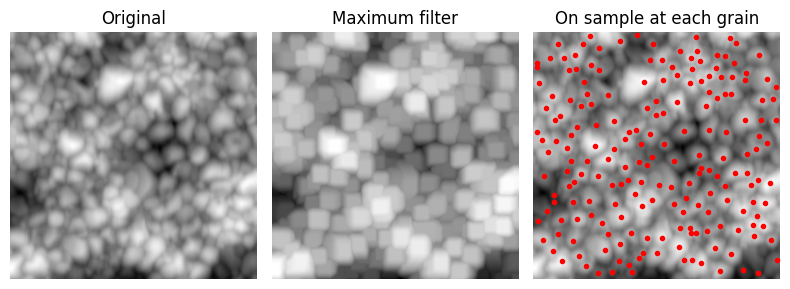

In [145]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = np.array(height)
im = (im - im.min())/im.max()

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=10, mode = 'reflect')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=2)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('On sample at each grain')

fig.tight_layout()

plt.show()

In [143]:
import matplotlib.pyplot as plt

from skimage.measure import label
from skimage import data
from skimage import color
from skimage.morphology import extrema
from skimage import exposure

im = np.array(height)
img = (im - im.min())/im.max()

(-0.5, 255.5, 255.5, -0.5)

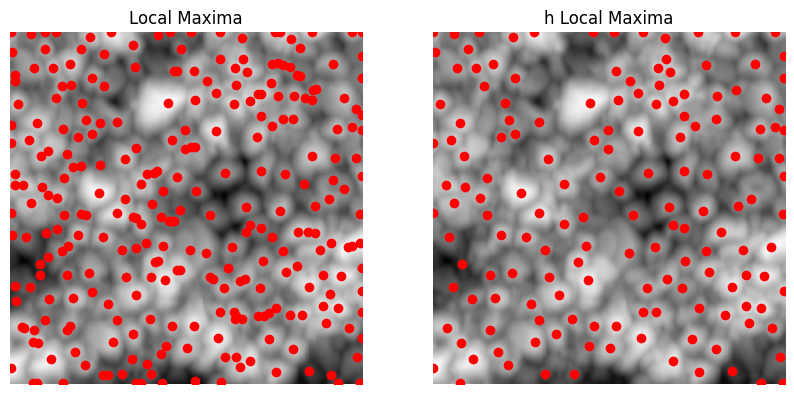

In [146]:
# Maxima in the galaxy image are detected by mathematical morphology.
# There is no a priori constraint on the density.

# We find all local maxima
local_maxima = extrema.local_maxima(img)
coords1 = np.argwhere(local_maxima)

# We observed in the previous image, that there are many local maxima
# that are caused by the noise in the image.
# For this, we find all local maxima with a height of h.
# This height is the gray level value by which we need to descent
# in order to reach a higher maximum and it can be seen as a local
# contrast measurement.
# The value of h scales with the dynamic range of the image, i.e.
# if we multiply the image with a constant, we need to multiply
# the value of h with the same constant in order to achieve the same result.
h = 0.05
h_maxima = extrema.h_maxima(img, h)
coords2 = np.argwhere(h_maxima)

# a new figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap='gray')
ax[0].scatter(coords1[:, 1], coords1[:, 0], c = 'r')
ax[0].set_title('Local Maxima')
ax[0].axis('off')

ax[1].imshow(img, cmap='gray')
ax[1].scatter(coords2[:, 1], coords2[:, 0], c = 'r')
ax[1].set_title('h Local Maxima')
ax[1].axis('off')
